In [ ]:
# from identify_candlestick import recognize_candlestick

from keras.layers import Dropout
from keras.layers import Dense
from  tensorflow.keras import models
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import talib
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
# import yfinance as yf
import seaborn as sns
from datetime import datetime
from os import listdir
import random
random.seed(42)
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
from keras.layers import Dropout
from keras.layers import Dense
from  tensorflow.keras import models
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
# import yfinance as yf
import seaborn as sns
from datetime import datetime
from os import listdir
import random
random.seed(42)
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [117]:
path = r"/content/drive/MyDrive/Colab Notebooks/binance-master/rsibot/tactic/august_data/vinddata.csv"
vind_df = pd.read_csv(path, sep = ";")

path = r"/content/drive/MyDrive/Colab Notebooks/binance-master/rsibot/tactic/august_data/halmstads_vand_v2.csv"
vand_halmsted = pd.read_csv(path, sep = ";")

path = r"/content/drive/MyDrive/Colab Notebooks/binance-master/rsibot/tactic/august_data/viken_vand_v2.csv"
vand_viken = pd.read_csv(path, sep = ";")

In [118]:
vand_viken = vand_viken.drop(columns = ["Kvalitet", "Mätdjup"])
vand_halmsted = vand_halmsted.drop(columns = ["Kvalitet", "Mätdjup"])
vind_df = vind_df.drop(columns=["Kvalitet", "Kvalitet.1"])

In [119]:
vind_df["test"] = vind_df.apply(lambda x: x["Datum"] +" "+ x["Tid (UTC)"][:-3] ,axis=1)

In [120]:
vind_df

,Datum,Tid (UTC),Vindriktning,Vindhastighet,test
0,01-01-1961,06:00:00,140,7.0,01-01-1961 06:00
1,01-01-1961,12:00:00,140,2.0,01-01-1961 12:00
2,01-01-1961,18:00:00,140,2.0,01-01-1961 18:00
3,02-01-1961,06:00:00,160,4.0,02-01-1961 06:00
4,02-01-1961,12:00:00,140,7.0,02-01-1961 12:00
...,...,...,...,...,...
218373,01-01-2021,02:00:00,131,3.5,01-01-2021 02:00
218374,01-01-2021,03:00:00,128,3.3,01-01-2021 03:00
218375,01-01-2021,04:00:00,133,3.3,01-01-2021 04:00
218376,01-01-2021,05:00:00,127,3.3,01-01-2021 05:00


In [121]:
df = vand_viken.join(vind_df.set_index("test"), on ="Datum Tid (UTC)")
# df = df.join(NY_VIND_FIL.set_index("test"), on ="Datum Tid (UTC)")


In [122]:
df = df.drop(columns=["Datum","Tid (UTC)"])

In [123]:
df = df.dropna() 

In [124]:
dataset = df

In [125]:
dataset

,Datum Tid (UTC),"Havsvattenstånd, RW timvärde",Vindriktning,Vindhastighet
168946,01-08-1995 00:00,-2.4,145.0,4.2
168947,01-08-1995 01:00,-2.4,142.0,4.3
168948,01-08-1995 02:00,-4.4,140.0,3.8
168949,01-08-1995 03:00,-7.4,125.0,2.0
168950,01-08-1995 04:00,-11.4,37.0,1.0
...,...,...,...,...
391779,01-01-2021 02:00,-14.3,131.0,3.5
391780,01-01-2021 03:00,-16.2,128.0,3.3
391781,01-01-2021 04:00,-15.5,133.0,3.3
391782,01-01-2021 05:00,-12.2,127.0,3.3


In [126]:
dataset = dataset.rename(columns= {"Datum Tid (UTC)" : "tid","Havsvattenstånd, RW timvärde" : "vigin_vand","Vindriktning":"vindretning", "Vindhastighet" : "vind_hastighed"})
dataset_big = dataset.rename(columns= {"Datum Tid (UTC)" : "tid","Havsvattenstånd, RW timvärde" : "vigin_vand","Vindriktning":"vindretning", "Vindhastighet" : "vind_hastighed"})
vand_halmsted = vand_halmsted.rename(columns={"Havsvattenstånd, RW timvärde" : "halmsted_labels"})

In [127]:
dataset_big 

,tid,vigin_vand,vindretning,vind_hastighed
168946,01-08-1995 00:00,-2.4,145.0,4.2
168947,01-08-1995 01:00,-2.4,142.0,4.3
168948,01-08-1995 02:00,-4.4,140.0,3.8
168949,01-08-1995 03:00,-7.4,125.0,2.0
168950,01-08-1995 04:00,-11.4,37.0,1.0
...,...,...,...,...
391779,01-01-2021 02:00,-14.3,131.0,3.5
391780,01-01-2021 03:00,-16.2,128.0,3.3
391781,01-01-2021 04:00,-15.5,133.0,3.3
391782,01-01-2021 05:00,-12.2,127.0,3.3


In [128]:
vand_halmsted


,Datum Tid (UTC),halmsted_labels
0,27-04-2009 15:00,-12.2
1,27-04-2009 16:00,-11.7
2,27-04-2009 17:00,-12.8
3,27-04-2009 18:00,-8.1
4,27-04-2009 19:00,-0.2
...,...,...
102302,19-04-2021 20:00,-8.6
102303,19-04-2021 21:00,-9.8
102304,19-04-2021 22:00,-7.8
102305,19-04-2021 23:00,-5.8


In [129]:
df = dataset.set_index("tid").join(vand_halmsted.set_index("Datum Tid (UTC)"), on ="tid")
df = df.dropna()

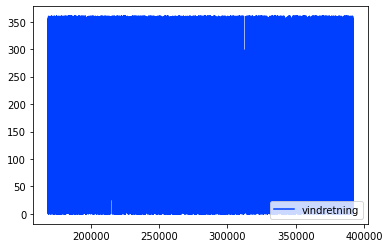

In [130]:
dataset_big[["vindretning"]].plot()

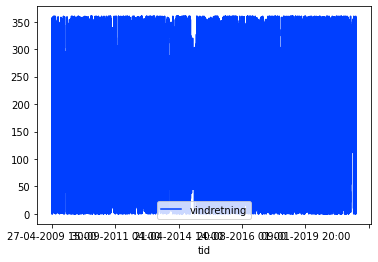

In [131]:
df[["vindretning"]].plot()

In [132]:
dataset = df 

In [133]:
save = dataset

In [134]:
dataset = save

In [135]:
save

,vigin_vand,vindretning,vind_hastighed,halmsted_labels
tid,,,,
27-04-2009 15:00,-13.6,202.0,3.3,-12.2
27-04-2009 16:00,-15.1,222.0,3.2,-11.7
27-04-2009 17:00,-15.7,194.0,6.0,-12.8
27-04-2009 18:00,-12.0,229.0,7.2,-8.1
27-04-2009 19:00,-12.9,238.0,5.1,-0.2
...,...,...,...,...
01-01-2021 02:00,-14.3,131.0,3.5,-10.9
01-01-2021 03:00,-16.2,128.0,3.3,-12.7
01-01-2021 04:00,-15.5,133.0,3.3,-12.3


In [178]:
dataset = save
dataset = dataset.reset_index()
dataset = dataset.dropna()

dataset.dropna(inplace=True)
# X = dataset[["Close", "log_returns"]].values
X = dataset.drop(columns=["tid"]).values
# X_for_predict = dataset.drop(columns=["tid","halmsted_labels"]).values

# scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
# scaler_for_predict = MinMaxScaler(feature_range=(0,1)).fit(X_for_predict)
# x_scaled = scaler.transform(X)
x_scaled = X
y = [x[-1] for x in x_scaled]

split = int(len(x_scaled) *0.8)

x_train = x_scaled[:split]
x_test = x_scaled[split: len(x_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

#nummer af dage vi kigger tilbage, hvis du ændre det kan du godt se på træningsdataen hvordan det påvirker dine resultater 
#men der skal også rodes med nogle ting i den del af koden der predicter ny data hvis du ændre på n
n = 3
xtrain = []
ytrain = []
xtest = []
ytest = []

for i in range(n, len(x_train)):
  xtrain.append(x_train[i-n : i, : x_train.shape[1]-1])
  ytrain.append(y_train[i-1])
for i in range(n, len(x_test)):
  xtest.append(x_test[i-n : i, : x_test.shape[1]-1])
  ytest.append(y_test[i-1])


xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1], xtrain.shape[2]))

xtest, ytest = (np.array(xtest), np.array(ytest))
xtest = np.reshape(xtest,(xtest.shape[0], xtest.shape[1], xtest.shape[2]))

#her træner vi modellen tallene 300 100 100 100 er hvor mange neuroner hvert lag har, hvis du ændre på dem gør du selve netværket større eller mindre. større medfører lidt langsommere og måske bedre resultater og omvendt for mindre tal
model = Sequential()
model.add(LSTM(300, return_sequences = True, input_shape = (xtrain.shape[1], xtrain.shape[2]))) #return_sequences = True
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(
    xtrain, ytrain, epochs=18, validation_data=(xtest,ytest), batch_size=126, verbose=1
)

trainpredict = model.predict(xtrain)
testpredict = model.predict(xtest)

#alt det her jeg laver med zeroes og z1 z2 og z3 er beværligt, kedeligt og spild af liv.. dont wast your time
zeroes1 = [np.zeros(trainpredict.shape) for x in range(len(X[0]))]
zeroes2 = [np.zeros(testpredict.shape) for x in range(len(X[0]))]

z1 = np.zeros(trainpredict.shape)
z2 = np.zeros(testpredict.shape)
zero = len(X[0])-1
print(zero)
# zeroes = np.c_[zeroes]
for i in range(zero):
  trainpredict = np.c_[trainpredict, z1]
  testpredict = np.c_[testpredict, z2]

# trainpredict = scaler.inverse_transform(trainpredict)
trainpredict = [x[0] for x in trainpredict]

# testpredict = scaler.inverse_transform(testpredict)
testpredict = [x[0] for x in testpredict]

z3 = np.zeros(ytest.shape)
for i in range(zero):
  ytest = np.c_[ytest, z3]
ytestscaled = ytest #= scaler.inverse_transform(ytest)
ytestscaled = [x[0] for x in ytestscaled]


df = pd.DataFrame()
df["pred_result"] = testpredict
df["result"] = ytestscaled
# her gemmer vi modellen 
models.save('/path_to_save_model/LSTM_v1') 


Epoch 1/18
611/611 [==============================] - 11s 10ms/step - loss: 201.6700 - val_loss: 41.9660
Epoch 2/18
611/611 [==============================] - 5s 9ms/step - loss: 61.7834 - val_loss: 29.7064
Epoch 3/18
611/611 [==============================] - 5s 8ms/step - loss: 54.4622 - val_loss: 21.3194
Epoch 4/18
611/611 [==============================] - 5s 9ms/step - loss: 54.2681 - val_loss: 20.2000
Epoch 5/18
611/611 [==============================] - 5s 8ms/step - loss: 46.7220 - val_loss: 16.7116
Epoch 6/18
611/611 [==============================] - 5s 9ms/step - loss: 48.0114 - val_loss: 19.1777
Epoch 7/18
611/611 [==============================] - 6s 9ms/step - loss: 50.8034 - val_loss: 15.0945
Epoch 8/18
611/611 [==============================] - 6s 9ms/step - loss: 46.5343 - val_loss: 14.8294
Epoch 9/18
611/611 [==============================] - 5s 9ms/step - loss: 47.4745 - val_loss: 18.0561
Epoch 10/18
611/611 [==============================] - 5s 9ms/step - loss: 46.8

In [179]:
df


,pred_result,result
0,18.233505,18.5
1,19.360449,22.3
2,21.203844,20.0
3,17.772932,20.4
4,15.713799,16.7
...,...,...
19217,-6.478447,-6.6
19218,-11.744089,-10.9
19219,-13.730008,-12.7
19220,-13.105997,-12.3


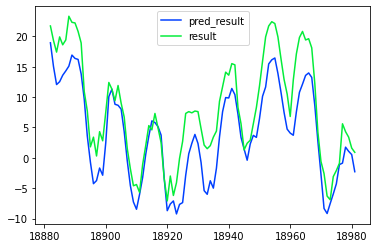

In [181]:
df[-340:-240].plot()


# predict with model


In [175]:
model = models.load_model('path_to_model/LSTM_v6') 

In [182]:
dataset

,tid,vigin_vand,vindretning,vind_hastighed,halmsted_labels
0,27-04-2009 15:00,-13.6,202.0,3.3,-12.2
1,27-04-2009 16:00,-15.1,222.0,3.2,-11.7
2,27-04-2009 17:00,-15.7,194.0,6.0,-12.8
3,27-04-2009 18:00,-12.0,229.0,7.2,-8.1
4,27-04-2009 19:00,-12.9,238.0,5.1,-0.2
...,...,...,...,...,...
96118,01-01-2021 02:00,-14.3,131.0,3.5,-10.9
96119,01-01-2021 03:00,-16.2,128.0,3.3,-12.7
96120,01-01-2021 04:00,-15.5,133.0,3.3,-12.3
96121,01-01-2021 05:00,-12.2,127.0,3.3,-11.8


In [183]:
dataset = dataset_big
dataset.dropna(inplace=True)
# dataset = dataset.reset_index()

X = dataset.drop(columns=["tid"]).values

# scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
# x_scaled = scaler_for_predict.transform(X)
x_scaled = X
n = 3
x = []

for i in range(n, len(x_scaled)):
  x.append(x_scaled[i-n : i, : x_scaled.shape[1]])
  

x= np.array(x)
x = np.reshape(x, (x.shape[0],x.shape[1], x.shape[2]))

predict = model.predict(x)


z1 = np.zeros(predict.shape)
zero = len(X[0])-1

for i in range(zero):
  predict = np.c_[predict, z1]

predict = [x[0] for x in predict]

dataset = dataset[3:]
dataset["preds"] = predict


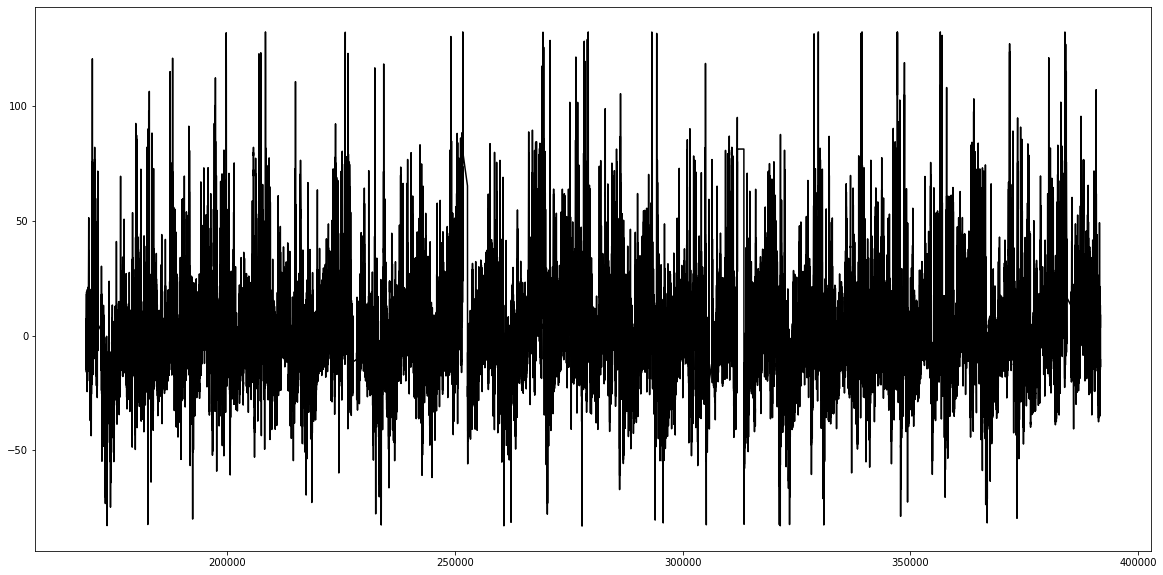

In [184]:

plt.style.use('seaborn-bright')
plt.figure(figsize=(20, 10))
plt.plot(dataset["preds"],
          color='black', label='Market Returns')

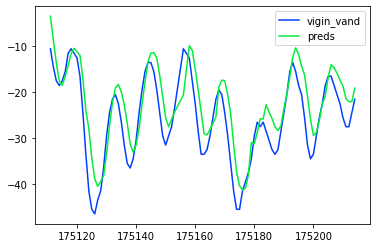

In [185]:
dataset[["vigin_vand","preds"]][5000:5100].plot()

In [186]:
df = dataset.set_index("tid").join(vand_halmsted.set_index("Datum Tid (UTC)"), on ="tid")
df = df.dropna()

In [189]:
df
df.to_csv("/content/drive/MyDrive/Colab Notebooks/binance-master/rsibot/tactic/august_data/dataset_samlet_vigin_halmsted_preds.csv", encoding = "utf8")

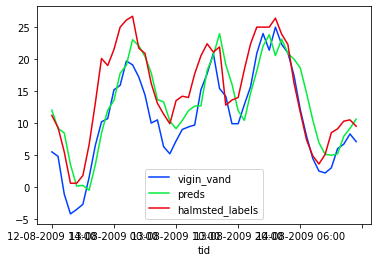

In [188]:
df[2150:2200].drop(columns = ["vindretning","vind_hastighed"]).plot()

In [191]:
df

,vigin_vand,vindretning,vind_hastighed,preds,halmsted_labels
tid,,,,,
27-04-2009 15:00,-13.6,202.0,3.3,-9.187726,-12.2
27-04-2009 16:00,-15.1,222.0,3.2,-9.795236,-11.7
27-04-2009 17:00,-15.7,194.0,6.0,-11.863389,-12.8
27-04-2009 18:00,-12.0,229.0,7.2,-11.844100,-8.1
27-04-2009 19:00,-12.9,238.0,5.1,-7.408491,-0.2
...,...,...,...,...,...
01-01-2021 02:00,-14.3,131.0,3.5,-6.478447,-10.9
01-01-2021 03:00,-16.2,128.0,3.3,-11.744089,-12.7
01-01-2021 04:00,-15.5,133.0,3.3,-13.730008,-12.3


In [192]:
  
# dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/binance-master/rsibot/tactic/august_data/big_dataset_with_preds.csv", encoding = "utf8")